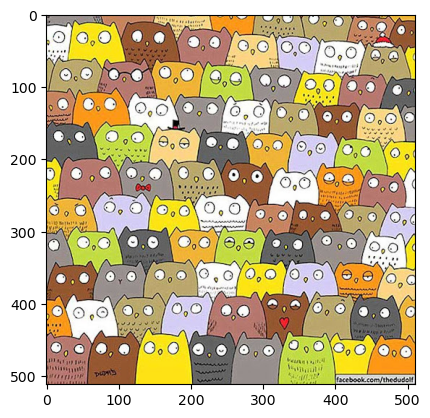

In [104]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for edge detection using Laplacian kernel
def edge_detection(image):
    kernel = np.array(
        [[1, 1, 1],
         [1, -8, 1],
         [1, 1, 1]]
    )
    edges = cv2.filter2D(image, -1, kernel)
    return edges

# Non-Maximum Suppression (NMS)
def non_max_suppression(boxes, overlapThresh):
    if len(boxes) == 0:
        return []
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
    pick = []
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / area[idxs[:last]]
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))
    return boxes[pick].astype("int")

# Count the number of pair_boot with NMS
def count_owl(image, templates, edges):

    # Apply template matching and collect bounding boxes
    boxes = []
    threshold = 0.18

    for template in templates:
        res = cv2.matchTemplate(edges, template, cv2.TM_CCOEFF_NORMED)
        loc = np.where(res >= threshold)
        
        for pt in zip(*loc[::-1]):
            box = [pt[0], pt[1], pt[0] + template.shape[1], pt[1] + template.shape[0]]
            boxes.append(box)

    # Convert boxes to numpy array
    boxes = np.array(boxes)

    # Apply non-max suppression
    if len(boxes) > 0:
        boxes = non_max_suppression(boxes, overlapThresh=0.1)

    # Draw rectangles for remaining boxes
    for (x1, y1, x2, y2) in boxes:
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Show the image with bounding boxes
    plt.imshow(image[:,:,::-1])
    plt.title(f'Number of objects found: {len(boxes)}')
    plt.axis('off')
    plt.show()

    return len(boxes)


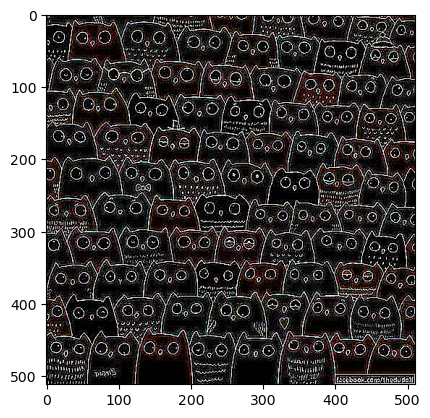

In [106]:
# Apply edge detection
edges = edge_detection(image)
plt.imshow(edges, cmap='gray')

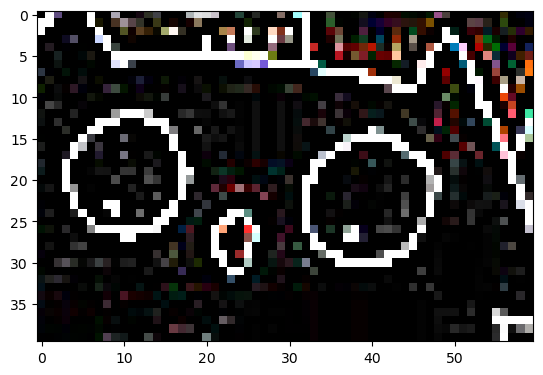

In [107]:
# Create list of templates
templates = []
# Get template for owl
template1 = edges[110:150, 120:180]
plt.imshow(template1, cmap='gray')
templates.append(template1)

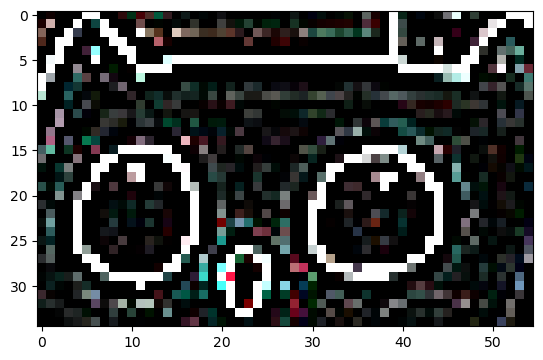

In [108]:
# Get template for owl
template2 = edges[385:420, 170:225]
plt.imshow(template2, cmap='gray')
templates.append(template2)

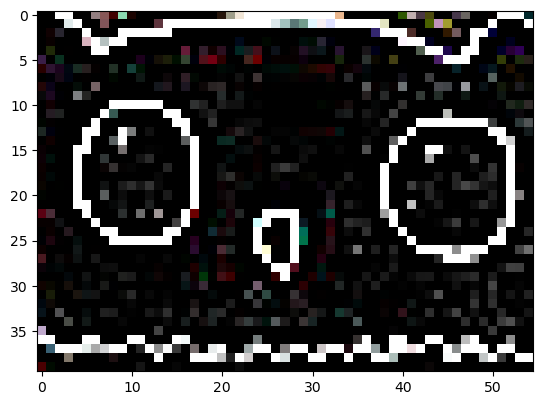

In [109]:
# Get template for owl
template3 = edges[250: 290, 215: 270]
plt.imshow(template3, cmap='gray')
templates.append(template3)

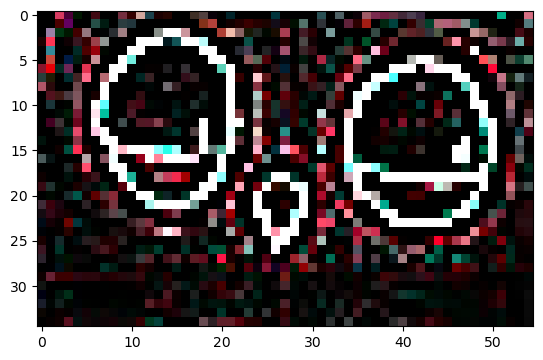

In [110]:
# Get template for owl
template4 = edges[75:110, 220: 275]
plt.imshow(template4, cmap='gray')
templates.append(template4)

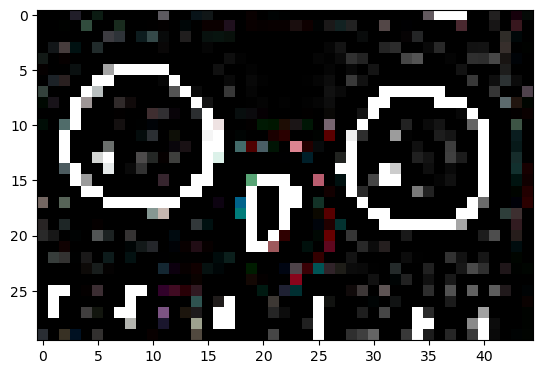

In [111]:
# Get template for owl
template5 = edges[310: 340, 445: 490]
plt.imshow(template5, cmap='gray')
templates.append(template5)

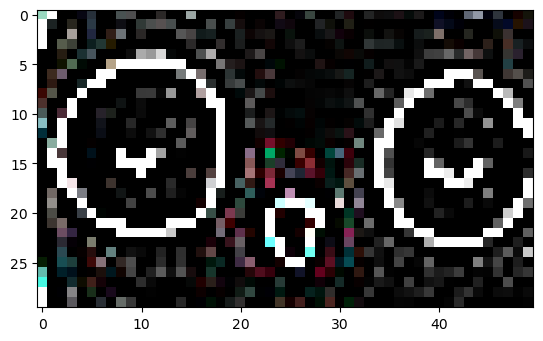

In [112]:
# Get template for owl
template6 = edges[450: 480, 200: 250]
plt.imshow(template6, cmap='gray')
templates.append(template6)

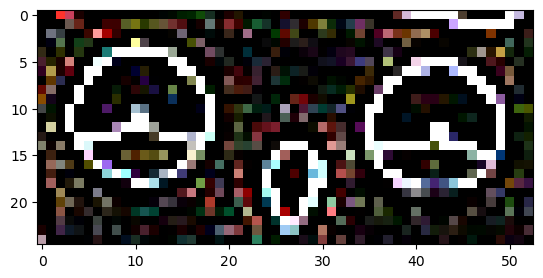

In [113]:
# Get template for owl
template7 = edges[390: 415, 302: 355]
plt.imshow(template7, cmap='gray')
templates.append(template7)

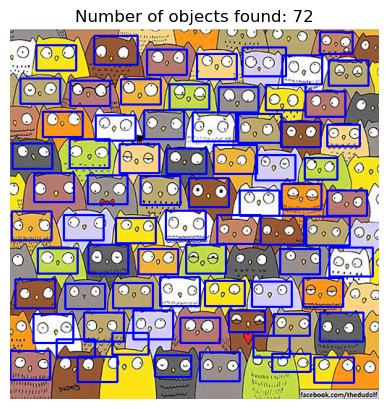

Number of pair_boot found: 72


In [114]:
# Count the number of owl 
count = count_owl(image, templates, edges)
print('Number of pair_boot found:', count)